In [129]:
import pandas as pd
from pandas import read_csv
from pandas import datetime
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from statsmodels.multivariate.manova import MANOVA
import seaborn as sns
import numpy as np
from math import sqrt

from numpy import array
from numpy import newaxis
import math
from scipy import stats
from subprocess import check_output

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import  train_test_split
import time #helper libraries
import matplotlib.pyplot as plt

            CME_RBS  CME_RRS  CME_SES
CME_SED                              
2019-05-01   2.0642   10.255  424.371
2019-04-30   2.1232   10.275  424.371
2019-04-29   2.0828   10.315  424.247
2019-04-26   2.1006   10.195  424.298
2019-04-24   2.1321   10.160  425.273


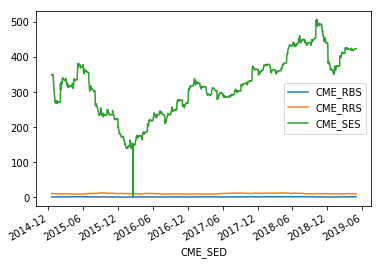

In [98]:

def parser(x):
     return datetime.strptime(x, '%m/%d/%Y')
 
series = pd.read_csv('features15.csv', header=0, keep_default_na=False, usecols=[19,8,20,5], index_col = 2, parse_dates=[2], date_parser=parser,  low_memory=False)
print(series.head())
series.plot()
plt.show()   

(array([794], dtype=int64), array([2], dtype=int64))


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


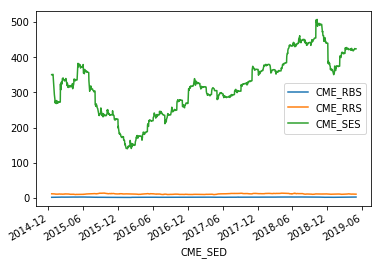

In [99]:
df= series.fillna(0)
df_z = np.abs(stats.zscore(df))
threshhold = 3
print(np.where(df_z>threshhold))
df_o = df[(df_z <threshhold)]
df_o = df_o[~(df == 0).any(axis=1)]

df_o.plot()

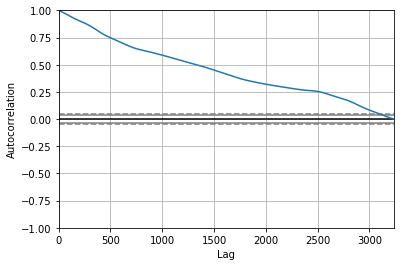

In [100]:
autocorrelation_plot(df_o)


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


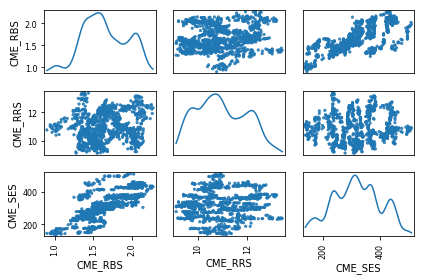

In [101]:
pd.tools.plotting.scatter_matrix(df_o.loc[:, "CME_RBS":"CME_SES"], diagonal="kde")
plt.tight_layout()
plt.show()

In [108]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
johan_test_temp = df_o
coint_johansen(johan_test_temp,-1,1).eig


array([9.49837511e-03, 1.10497391e-03, 1.12573555e-06])

In [118]:
train = df_o[:int(0.69*(len(df_o)))]
test =df_o[int(0.69*(len(df_o))):]

In [119]:
from statsmodels.tsa.vector_ar.var_model import VAR


In [120]:
model = VAR(endog=train)
model_fit = model.fit()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


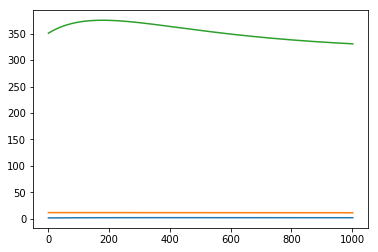

In [134]:
prediction = model_fit.forecast(model_fit.y, steps=len(test))
plt.plot(prediction)

In [131]:
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
cols = df_o.columns
for j in range(0,3):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

#check rmse
for i in cols:
    print('rmse value for', i, 'is : ', sqrt(mean_squared_error(pred[i], test[i])))

rmse value for CME_RBS is :  0.4504709477365321
rmse value for CME_RRS is :  1.0789045138238293
rmse value for CME_SES is :  109.89602409042159


In [132]:
model = VAR(endog=df_o)
model_fit = model.fit()
yhat = model_fit.forecast(model_fit.y, steps=1)
print(yhat)

[[  1.31715286  11.33140107 350.9215514 ]]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
